 <b><p style="font-size:350%;  color:#363636"> IBM Course 8 Final Project  Part1 </p></b>

In [1]:
# import necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline
import datetime as dt

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update
import datetime as dt

### The dataset includes the following variables:

**Date:** The date of the observation.<br>
**Recession:** A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.<br>
**Automobile_Sales:** The number of vehicles sold during the period.<br>
**GDP:** The per capita GDP value in USD.<br>
**Unemployment_Rate:** The monthly unemployment rate.<br>
**Consumer_Confidence:** A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.<br>
**Seasonality_Weight:** The weight representing the seasonality effect on automobile sales during the period.<br>
**Price:** The average vehicle price during the period.<br>
**Advertising_Expenditure:** The advertising expenditure of the company.<br>
**Vehicle_Type:** The type of vehicles sold; Supperminicar, Smallfamiliycar, Mediumfamilycar, Executivecar, Sports.<br>
**Competition:** The measure of competition in the market, such as the number of competitors or market share of major manufacturers.<br>
**Month:** Month of the observation extracted from Date.<br>
**Year:** Year of the observation extracted from Date.<br>

### Data preparation 

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

df = pd.read_csv(URL)

# change 0 1 to No Yes in the Recession state
df['Recession'].replace({ 0:'No', 1:'Yes'}, inplace=True)

In [3]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,Yes,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,Yes,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,Yes,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,Yes,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,Yes,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [4]:
df.shape

(528, 15)

In [5]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                   object
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

In [6]:
df.isna().sum()

Date                       0
Year                       0
Month                      0
Recession                  0
Consumer_Confidence        0
Seasonality_Weight         0
Price                      0
Advertising_Expenditure    0
Competition                0
GDP                        0
Growth_Rate                0
unemployment_rate          0
Automobile_Sales           0
Vehicle_Type               0
City                       0
dtype: int64

In [7]:
# df.to_csv('D:\PyWorks\Pydata\/auto_recession.csv', index=False)

## Part 1: Create visualizations using Matplotib, Seaborn & Folium

<b><p style="font-size:100%;  color:#E1511D ">  
11.Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year.
</p></b>

In [8]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

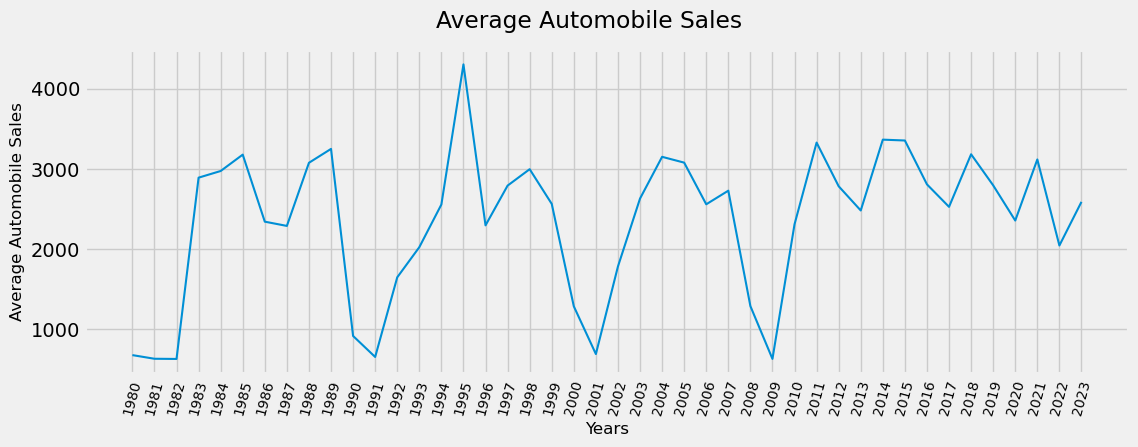

In [9]:

# group by year with an average of sales
auto_sales= df.groupby('Year', as_index=False)['Automobile_Sales'].mean()

# plot using  matplotlib :
plt.style.use('fivethirtyeight')
fig , ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=False, figsize= (12,4))
ax.plot(auto_sales['Year'].astype(str),auto_sales['Automobile_Sales'], lw=1.5 )
# labels
ax.set_xlabel('Years',size=12)
ax.set_ylabel('Average Automobile Sales',size=12)
plt.xticks(fontsize=10,rotation=75)
plt.suptitle('Average Automobile Sales')

# show the plot 
plt.show();




<b><p style="font-size:100%;  color:#252525 ">  
12.Plot different lines for categories of vehicle type and analyse the trend to answer the question “Is there a noticeable difference in sales trends between different vehicle types during recession periods?”
</p></b>

In [10]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


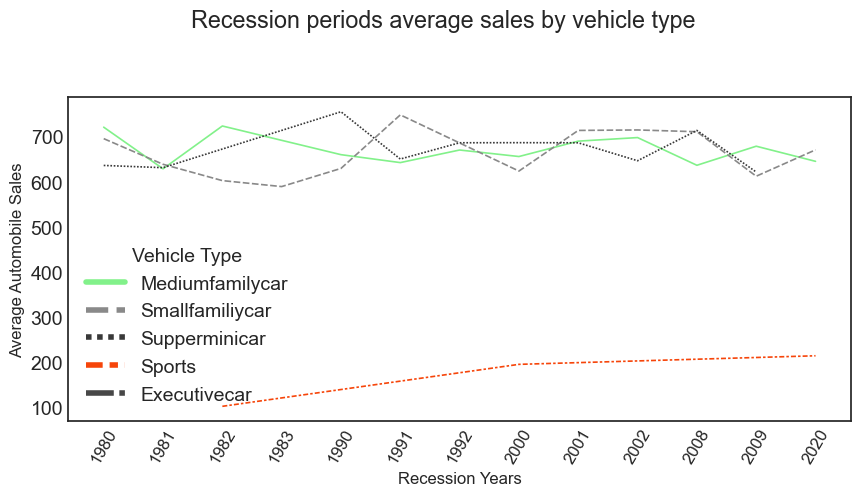

In [11]:
# group by year and category:
recession_df = df[df['Recession']=='Yes']
sales_cat= recession_df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# asign varibles 
x=sales_cat['Year'].astype(str)
y= sales_cat['Automobile_Sales' ]
cat= sales_cat['Vehicle_Type']
cols = ['#82F18A' ,'#898989' , '#393939' , '#F6450A' , '#474747' ]

# plot using  matplotlib :
plt.style.use('seaborn-v0_8-white')
fig , ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=False, figsize= (9,4))
sns.lineplot(x=x, y=y , hue= cat ,lw= 1.2, style= cat, palette=cols )
# labels
ax.set_xlabel('Recession Years',size=12)
ax.set_ylabel('Average Automobile Sales',size=12)
plt.xticks(rotation=60, fontsize= 12)
plt.suptitle('Recession periods average sales by vehicle type ' , y=1.1)
plt.legend(title='Vehicle Type', loc=0 )
# show the plot 
plt.show();


<b><p style="font-size:100%;  color:#252525 ">  
From the above plot, what insights have you gained on the sales of various vehicle types?
</p></b>

As shown in the plot, It's clear that sport vehicles sales droped during the recession periods


<b><p style="font-size:100%;  color:#363636 ">  
13.Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.
</p></b>

In [12]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
# new_df['Automobile_Sales'].astype(int)

In [13]:
new_df

,Recession,Automobile_Sales
0,No,2816.753590
1,Yes,648.516814


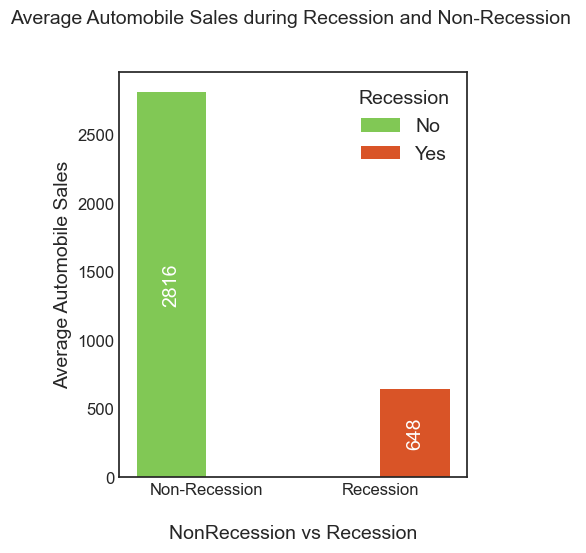

In [14]:


# plot using  matplotlib :
plt.style.use('seaborn-v0_8-white')
fig , ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=False, figsize= (4,5))
sns.barplot(x=new_df['Recession'].astype(str), y=new_df['Automobile_Sales'].astype(int) , hue=new_df['Recession'] ,palette= ['#7DDB42','#F6450A' ] )

# labels
ax.set_xlabel('NonRecession vs Recession',size=14, labelpad=20)
ax.set_ylabel('Average Automobile Sales',size=14)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'] )
ax.bar_label(ax.containers[0], label_type='center', rotation=90, color='white')
ax.bar_label(ax.containers[1], label_type='center', rotation=90, color='white')
plt.tick_params( labelleft=True, right=False , labelsize=12) 
plt.title('Average Automobile Sales during Recession and Non-Recession ' , y=1.1 ,size=14 )
plt.show();

<b><p style="font-size:100%;  color:#363636 ">  
Now you want to compare the sales of different vehicle types during a recession and a non-recession period
</p></b>

In [15]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [16]:
re_df = df.groupby(['Recession','Vehicle_Type'], as_index=False )['Automobile_Sales'].mean()
re_df['Automobile_Sales']= re_df['Automobile_Sales'].astype(int)

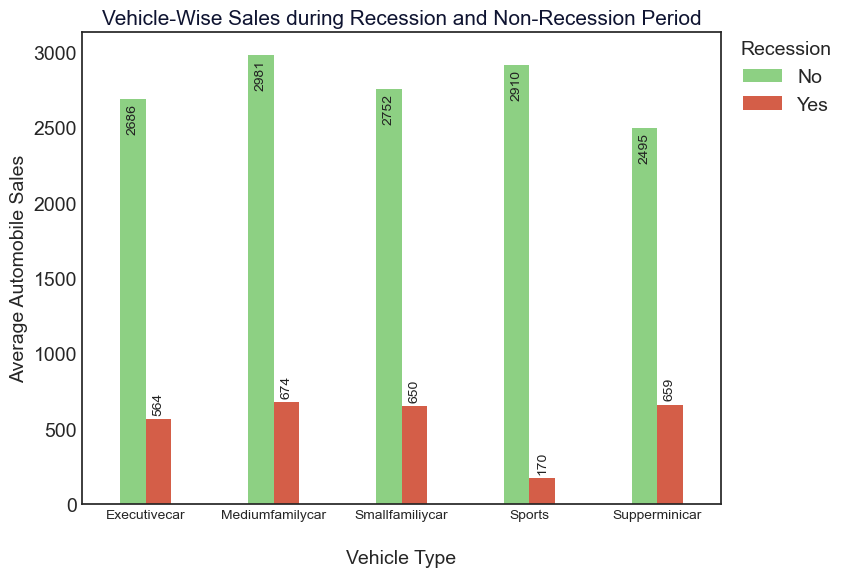

In [17]:
fig, axes = plt.subplots(nrows =1 , ncols=1, figsize=(9, 6) ,sharey=False , sharex=False, tight_layout=False )
# plot the bars
g1=sns.barplot(data = re_df , x='Vehicle_Type', y='Automobile_Sales' , hue= 'Recession', palette=["#84DD76", '#EC4E30'], width=0.4)

# # values inside the bar
g1.bar_label(g1.containers[0] ,color='#222222', rotation=90, size=10 , padding=-25 ) 
g1.bar_label(g1.containers[1] ,color='#222222', rotation=90, size=10  , padding=3 ) 
plt.xticks(size=10 )


# titles : 
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period', size= 15, color= '#0F1431'  )
g1.set_xlabel('Vehicle Type',size=14, labelpad=20)
g1.set_ylabel('Average Automobile Sales',size=14)
g1.legend(title= 'Recession' , bbox_to_anchor=(1.2, 1.02))

plt.show();


<b><p style="font-size:100%;  color:#363636 ">  
From the above chart what insights have you gained on the overall sales of automobiles during recession?
</p></b>

It's clear that the recession negatively affected the automobile sales market. We can see a nearly more than 75% decrease in sales during recession periods.  


<b><p style="font-size:100%;  color:#E1511D ">  
14.Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
</p></b>

In [18]:
gdp_df = df.groupby(['Recession','Year'], as_index=False )['GDP'].mean()
rec_gpd = gdp_df[gdp_df['Recession']=='Yes'] # recession period
nonrec_gpd = gdp_df[gdp_df['Recession']=='No'] # Non recession period

C:\Users\TAOS\AppData\Local\Temp\ipykernel_17608\2671506790.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(rec_gpd['Year'].astype(str) ,rotation=60, fontdict=None, minor=False)
C:\Users\TAOS\AppData\Local\Temp\ipykernel_17608\2671506790.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(nonrec_gpd['Year'].astype(str) ,rotation=60, fontdict=None, minor=False)


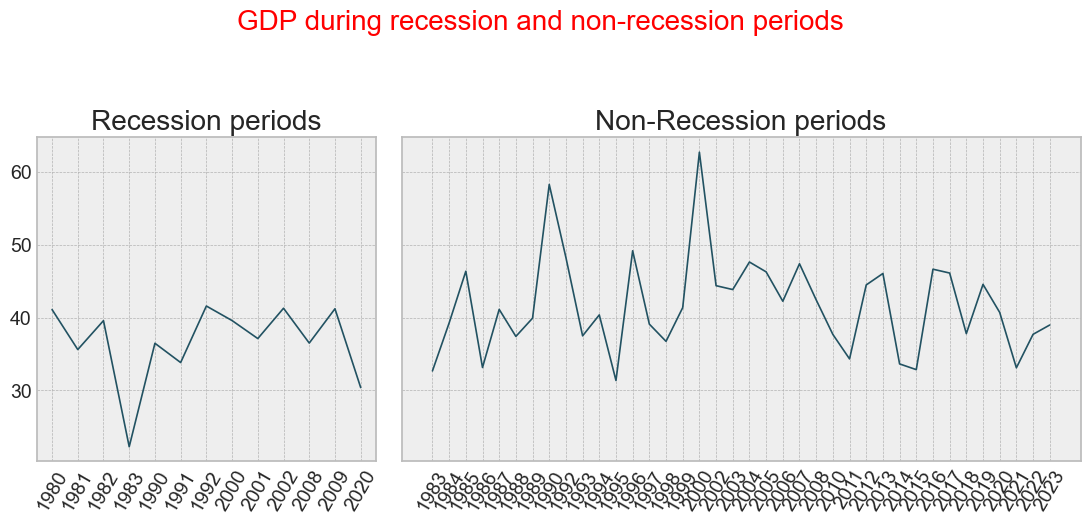

In [19]:

# set the variables
# x1 = rec_gpd['Year'].astype(str)
# x2 = nonrec_gpd['Year'].astype(str)

# y1 = rec_gpd['GDP']
# y2 = nonrec_gpd['GDP']

# style
plt.style.use('bmh')



#fig setup
fig  , ax = plt.subplots(nrows= 1 , ncols =2  , sharey =True , sharex =False , figsize=(12,4),  gridspec_kw={'width_ratios': [1, 2]})
plt.subplots_adjust( wspace= 0.05)

# plot1 
ax[0].plot(rec_gpd['Year'].astype(str) ,rec_gpd['GDP']  ,color='#225262',lw=1.2  )
ax[0].set_xticklabels(rec_gpd['Year'].astype(str) ,rotation=60, fontdict=None, minor=False)
ax[0].set_title("Recession periods", y=1)


# plot2
ax[1].plot(nonrec_gpd['Year'].astype(str) ,nonrec_gpd['GDP']  ,color='#225262',lw=1.2  )
ax[1].set_xticklabels(nonrec_gpd['Year'].astype(str) ,rotation=60, fontdict=None, minor=False)
ax[1].set_title("Non-Recession periods", y=1)

#suptitle:
fig.suptitle('GDP during recession and non-recession periods', color= 'r' ,size= 20 , x= 0.5  ,  y=1.2)


plt.show();


<b><p style="font-size:100%;  color:#363636 ">  
How did the GDP vary over time during recession and non-recession periods?
</p></b>

The GDP was lower during the recession times comparing to the thriving years which indicate ther was a correlation between GDP and firms incomes


<b><p style="font-size:100%;  color:#E1511D ">  
15.Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
</p></b>

In [20]:
rec_df = df[df['Recession']=='Yes']
non_df = df[df['Recession']=='No']

In [21]:
non_df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

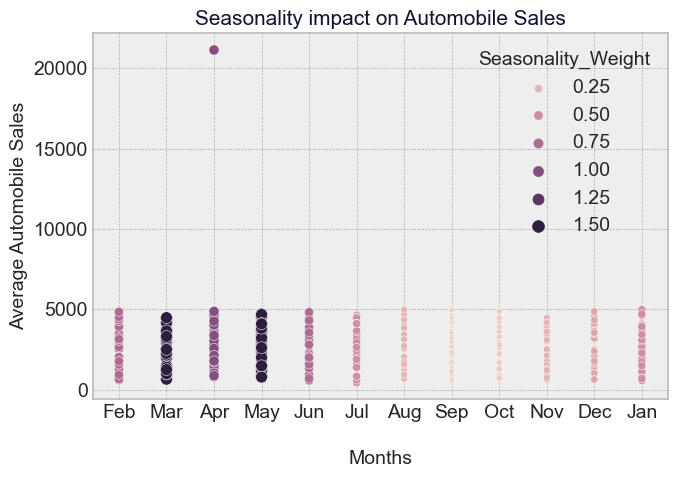

In [22]:
# style
plt.style.use('bmh')


#fig setup 
fig, axes = plt.subplots(nrows =1 , ncols=1, figsize=(7, 5) ,sharey=False , sharex=False, tight_layout=False )

# plot bubbles
g1=sns.scatterplot(data=non_df   ,   x='Month' , y='Automobile_Sales'  , size='Seasonality_Weight' ,
                   hue= 'Seasonality_Weight' )



# titles : 
plt.title('Seasonality impact on Automobile Sales', size= 15, color= '#0F1431'  )
g1.set_xlabel('Months',size=14, labelpad=20)
g1.set_ylabel('Average Automobile Sales',size=14)
# g1.legend(title= 'Recession' , bbox_to_anchor=(1.2, 1.02))

plt.show();

In [23]:
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,Yes,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,Yes,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,Yes,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,Yes,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,Yes,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,No,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,No,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,No,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,No,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia



<b><p style="font-size:100%;  color:#E1511D ">  
16.Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
</p></b>

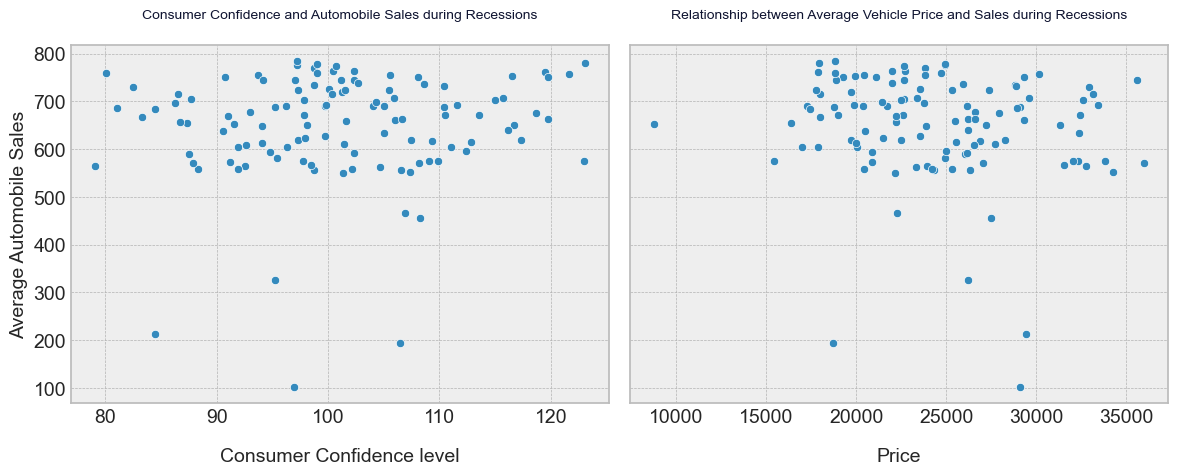

In [24]:
# style
plt.style.use('bmh')


#fig setup 
fig, axes = plt.subplots(nrows =1 , ncols=2, figsize=(12, 5) ,sharey=True , sharex=False, tight_layout=False )

# plots
g1=sns.scatterplot(data=rec_df   ,   x='Consumer_Confidence' , y='Automobile_Sales' ,ax=axes[0] )

g2=sns.scatterplot(data=rec_df   ,   x='Price' , y='Automobile_Sales' ,ax=axes[1]  )

# titles : 
g1.set_title( 'Consumer Confidence and Automobile Sales during Recessions', size= 10, color= '#0F1431' , y=1.05 )
g1.set_xlabel('Consumer Confidence level',size=14, labelpad=15)
g1.set_ylabel('Average Automobile Sales',size=14)

g2.set_title( 'Relationship between Average Vehicle Price and Sales during Recessions', size= 10, color= '#0F1431' , y=1.05 )
g2.set_xlabel('Price',size=14, labelpad=15)
g2.set_ylabel('Average Automobile Sales',size=14)

plt.show();

**According to the plots, there is no relationship between average sales and either the prices or consumer confidence levels during recession periods**


<b><p style="font-size:100%;  color:#E1511D ">  
17.Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
</p></b>

In [25]:
# the total sum of advertisment expenditure in recession years 
rec_advexp = rec_df['Advertising_Expenditure'].sum()

# the total sum of advertisment expenditure in non recession years 
nonrec_advexp = non_df['Advertising_Expenditure'].sum()

#create df for adv exp 
adv_df = pd.DataFrame({'Period':['Recession','Non-Recession'],
         'Advertising_Expenditure':[rec_advexp,nonrec_advexp]})



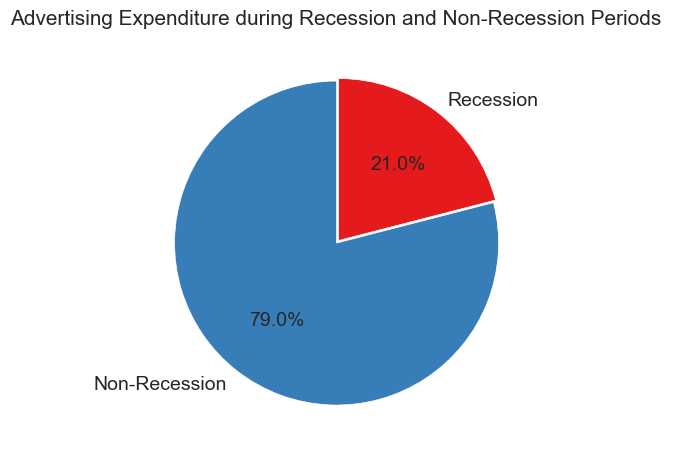

In [26]:
# style 
sns.set_style("ticks")


# fig setup :

fig, axes=plt.subplots(nrows= 1 , ncols= 1 , figsize= (8,5))

img1 = plt.pie( data =adv_df  , x= 'Advertising_Expenditure'  , labels='Period' , autopct='%0.1f%%',
               textprops={'fontsize':14 } , colors=sns.color_palette('Set1') ,
              startangle=90 , counterclock=False, explode = (0, 0.02))


# fig Sub title

plt.title(
    label="Advertising Expenditure during Recession and Non-Recession Periods ", 
    fontdict={"fontsize":15},
    pad=10
)


plt.show();


<b><p style="font-size:100%;  color:#E1511D ">  
18. Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.
</p></b>

In [27]:
rec_df = df[df['Recession']=='Yes']

rec_vtype = rec_df.groupby(by='Vehicle_Type' , as_index=False)['Advertising_Expenditure'].sum()
rec_vtype

,Vehicle_Type,Advertising_Expenditure
0,Executivecar,3243
1,Mediumfamilycar,130612
2,Smallfamiliycar,102759
3,Sports,12568
4,Supperminicar,90728


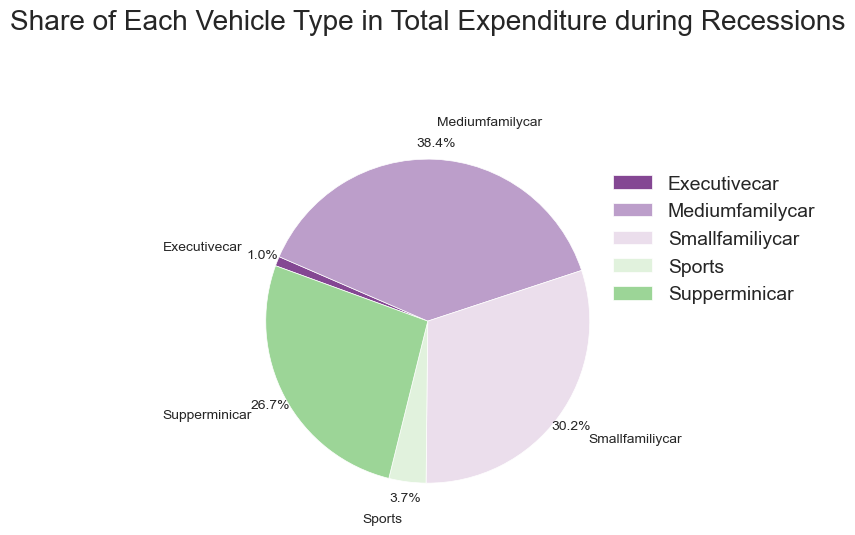

In [28]:
# style 
sns.set_style("ticks")


# fig setup :

fig, axes=plt.subplots(nrows= 1 , ncols= 1 , figsize= (9,5))

plt.pie(data=rec_vtype , x='Advertising_Expenditure'  , labels='Vehicle_Type' ,labeldistance=1.23 ,  autopct='%1.1f%%', pctdistance=1.1,
        textprops={'fontsize':10 } ,  colors=sns.color_palette('PRGn') ,
        startangle=160 , counterclock=False,  )

plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions', y=1.2)
plt.legend(loc=4 , bbox_to_anchor=(1.5,0.5),)


plt.show();

**During recession periods, companies reallocated their advertising budgets towards small and medium-sized vehicles, rather than the other two types, namely sports and executive vehicles.**


<b><p style="font-size:100%;  color:#E1511D ">  
19.Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
</p></b>

In [29]:
rec_df = df[df['Recession']=='Yes']
rec_df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



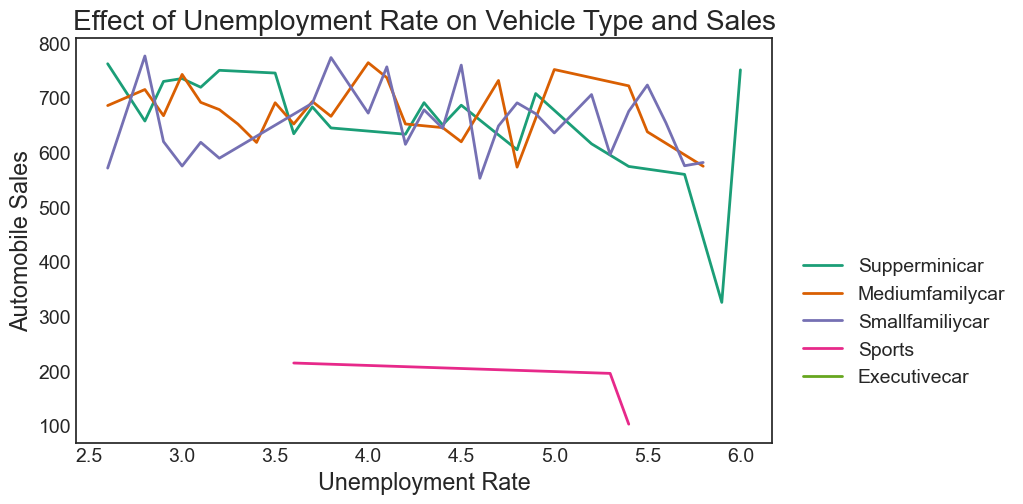

In [48]:
# style 
sns.set_style("ticks")

# fig setup :
img , axes=plt.subplots(nrows=1, ncols=1, figsize= (8,5) , sharex= False , sharey= False)

# plot figs:

img1 = sns.lineplot(data=rec_df , x= 'unemployment_rate', y ='Automobile_Sales' ,
                    hue='Vehicle_Type', err_style=None , palette='Dark2')

# Titles :

plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
img1.set_xlabel('Unemployment Rate')
img1.set_ylabel('Automobile Sales')
plt.legend(loc=0 , bbox_to_anchor=(1.02,0.5),)

plt.show();

**The plot illustrates that during recessions, there was a shift in buying patterns, resulting in decrease sales of low-range vehicles—including superminicars, and medium minicars**

<br><br><br>

### Done